In [13]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [14]:
def data_in(fileName,feature_num = 0):

    data = []
    with open(fileName) as f:
        for i in f.readlines():
            (user,movieid,rating,ts)=i.split('\t')
            data.append([int(user),int(movieid),float(rating)])
    user_num = int(np.max(data,axis = 0)[0]) 
    item_num = int(np.max(data,axis = 0)[1]) 
    item_num= max(int(feature_num),item_num)

    score = mat(zeros((user_num,item_num)))
    for i in data:
        user = i[0]-1
        item = i[1]-1
        score[user,item] = i[2]
    return score

trainMat = data_in("./u1.base")
testMat = data_in("./u1.test",trainMat.shape[1])

def loss(P,Q,rate,p = 100 , q = 100):
    a = rate - P*Q
    m,n = rate.shape
    return (sum(power(a,2))/(m+n) + p * sum(power(P,2))/m + q* sum(power(Q,2)))/n

def RMSE(P,Q,rate):
    left=sum(power(rate - P*Q , 2))
    right=rate.shape[0]+rate.shape[1]
    total=left/right
    return total

In [15]:
#随机梯度下降
def SGD(X,alpha = 0.05,k = 20,iteration = 1000,p =  0.02 , q =  0.02):
    m,n = X.shape
    P = mat(random.normal(size=(m,k))) #用户因子矩阵
    Q = mat(random.normal(size=(k,n))) #物品因子矩阵
    loss_list = []
    iter_list = []
    rmse_list = []
    for i in range(iteration):
        #随机选择用户评分矩阵中的一个sample
        u = random.randint(0,m)
        E = X[u,:] - P[u,:] * Q[:,:]
        #损失函数值对用户因子矩阵某一行（列）和物品因子矩阵某一行（列）的梯度
        grad_p = E * (-Q[:,:].T) + p *  P[u,:]
        grad_q =(-P[u,:].T)*E +q * Q[:,:]/n
        #更新梯度
        P[u,:] -= alpha * grad_p
        Q[:,:] -= alpha * grad_q
        
        loss_result = loss(P,Q,X,p,q)
        iter_list.append(i)
        loss_list.append(loss_result)
        rmse_list.append(RMSE(P,Q,X))
    return iter_list,loss_list,rmse_list

In [16]:
iter_list,loss_list,rmse_list = SGD(trainMat,
    alpha = 0.001,k = 20,iteration = 1000,p = 0.02,
           q = 0.02)

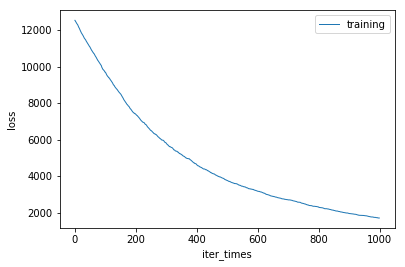

In [17]:
plt.figure()
plt.xlabel('iter_times')  
plt.ylabel('loss')
plt.plot(iter_list,rmse_list,linewidth = 1.0,label = "training")
plt.legend()
plt.show()